## 120 다산 콜 재단
- https://www.120dasan.or.kr/dsnc/main/main.do

### 머신러닝 분석과정
1. 토픽 모델링
  - 데이터를 학습 데이터와 시험 데이터로 나누기
  - 레이블 값을 행렬 형태로 만들기
  - 벡터화 하기
  - 예제 데이터를 시퀀스로 작성
  - 모델 작성
  - 모델 컴파일

- 토픽 모델링 : 문서의 주제 파악 및 분류
  - => 이건 chatGPT 가 어떤식으로 학습하고 모델링이 되어있는지 확인하기 위해 필요

#### 1) 라이브러리 설치 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.decomposition import LatentDirichletAllocation

### 1) 데이터 로드

In [20]:
df = pd.read_csv("./seoul-120-text.csv")
df.shape

(2645, 5)

In [5]:
df.head()

,번호,분류,제목,내용,내용번호
0,2645,복지,아빠 육아휴직 장려금,아빠 육아휴직 장려금 업무개요 남성근로자의 육아휴직을 장려하고 양육에 따른 경...,23522464
1,2644,경제,[서울산업진흥원] 서울메이드란?,서울산업진흥원 서울메이드란 서울의 감성을 담은 다양하고 새로운 경험을 제공하기 위해...,23194045
2,2643,환경,(강북구) 정비중,강북구 정비중 업무개요 투명 폐트병을 교환보상하므로 수거율을 높이고 폐기물을 감...,23032485
3,2642,복지,"광진맘택시 운영(임산부,영아 양육가정 전용 택시)",광진맘택시 운영임산부영아 양육가정 전용 택시 업무개요 교통약자인 임산부와 영아가정...,22904492
4,2641,복지,마포 뇌병변장애인 비전센터,마포 뇌병변장애인 비전센터 마포뇌병변장애인 비전센터 운영 구분 내용 목적 학...,22477798


In [7]:
# 결측치 확인

df.isnull().sum()

번호      0
분류      0
제목      0
내용      0
내용번호    0
dtype: int64

### 2) 데이터 전처리
- 제목과 내용을 + 로 합쳐서 문서라는 컬럼 생성(중간에 공백 추가)

In [21]:
df['문서'] = df['제목'] + " " + df['내용']

In [9]:
df.head()

,번호,분류,제목,내용,내용번호,문서
0,2645,복지,아빠 육아휴직 장려금,아빠 육아휴직 장려금 업무개요 남성근로자의 육아휴직을 장려하고 양육에 따른 경...,23522464,아빠 육아휴직 장려금 아빠 육아휴직 장려금 업무개요 남성근로자의 육아휴직을 장...
1,2644,경제,[서울산업진흥원] 서울메이드란?,서울산업진흥원 서울메이드란 서울의 감성을 담은 다양하고 새로운 경험을 제공하기 위해...,23194045,[서울산업진흥원] 서울메이드란? 서울산업진흥원 서울메이드란 서울의 감성을 담은 다양...
2,2643,환경,(강북구) 정비중,강북구 정비중 업무개요 투명 폐트병을 교환보상하므로 수거율을 높이고 폐기물을 감...,23032485,(강북구) 정비중 강북구 정비중 업무개요 투명 폐트병을 교환보상하므로 수거율을 ...
3,2642,복지,"광진맘택시 운영(임산부,영아 양육가정 전용 택시)",광진맘택시 운영임산부영아 양육가정 전용 택시 업무개요 교통약자인 임산부와 영아가정...,22904492,"광진맘택시 운영(임산부,영아 양육가정 전용 택시) 광진맘택시 운영임산부영아 양육가정..."
4,2641,복지,마포 뇌병변장애인 비전센터,마포 뇌병변장애인 비전센터 마포뇌병변장애인 비전센터 운영 구분 내용 목적 학...,22477798,마포 뇌병변장애인 비전센터 마포 뇌병변장애인 비전센터 마포뇌병변장애인 비전센터 운영...


### 3) 단어 벡터화
#### - CountVectorizer

In [22]:
# 단어들의 출현 빈도로 여러 문서 벡터화

cvect = CountVectorizer(stop_words=['돋움', '경우', '또는', '있습니다', '있는', '합니다'])
X = cvect.fit_transform(df['문서'])
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 117379 stored elements and shape (2645, 56648)>

In [11]:
cvect.vocabulary_

{'아빠': 30166,
 '육아휴직': 35794,
 '장려금': 40096,
 '업무개요': 31494,
 '남성근로자의': 9780,
 '육아휴직을': 35798,
 '장려하고': 40099,
 '양육에': 31079,
 '따른': 14184,
 '경제적': 3650,
 '부담을': 20458,
 '완화함으로써': 33605,
 '일과': 37802,
 '가정생활의': 694,
 '양립': 31009,
 '가족친화적인': 784,
 '사회환경': 22911,
 '조성': 43601,
 '지원대상': 46356,
 '신청일': 29324,
 '기준': 8969,
 '이상': 36691,
 '계속하여': 3781,
 '서초구에': 24773,
 '주민등록': 44415,
 '되어': 13584,
 '육아휴직자': 35799,
 '대상자녀': 11880,
 '신청기간': 29232,
 '시작일': 28426,
 '이후': 37282,
 '개월부터': 1767,
 '종료일': 44000,
 '개월': 1753,
 '이내': 36439,
 '신청방법': 29260,
 '온라인': 33390,
 '서초구청': 24776,
 '홈페이지': 55325,
 '경로': 3421,
 '분야별정보': 21117,
 '복지': 20129,
 '영유아복지': 32834,
 '아빠육아휴직장려금': 30170,
 '신청': 29215,
 '바로가기': 17408,
 '방문': 18118,
 '동주민센터': 13431,
 '여성보육과': 31951,
 '구비서류': 6902,
 '고용센터': 4208,
 '발행': 18048,
 '육아휴직급여': 35795,
 '지급결정': 45801,
 '통지서': 51045,
 '주민등록등본': 44417,
 '부세대원': 20662,
 '이름과': 36609,
 '전입일자': 41562,
 '포함': 52223,
 '모든': 15657,
 '구성원': 6951,
 '주민번호': 44458,
 '뒷자리': 13756,
 '미포함': 17033,
 

In [12]:
cvect_cols = cvect.get_feature_names_out()
cvect_cols[:100]

array(['03월', '08년', '10', '100명이상인', '100세가', '10만원', '10만원상당', '10명이고',
       '10인승', '10인의', '10일이내에', '120', '120다산콜센터', '12층', '1369', '13개',
       '16', '18세', '19', '1개', '1개씩', '1기', '1년에', '1만명', '1명의', '1사1촌을',
       '1세대', '1인당', '1인만', '1인의', '1절', '1종대상자로', '1차', '1층', '1회로',
       '1회했으나', '20', '2001년에', '2003', '2003년', '2005년', '2006',
       '2007년도부터', '2010', '2011', '2012년', '2014', '2014년', '2016',
       '2016년', '2017', '2017년', '2018년', '2019년', '2021년도', '21실천공모사업',
       '25', '25개', '25시', '284', '298', '2개', '2개단지를', '2구역', '2년치를',
       '2대의', '2동', '2를', '2종대상자이면서', '2종의', '2종일반주거지역', '2종일반주거지역내에',
       '2회', '30만원정도의', '31', '333', '3구역', '3구역내', '3년', '3만원', '3분의',
       '3분의1이', '3종', '3차', '3톤', '3톤미만', '455호에', '4대', '4대문안', '4명',
       '4별관', '4시간씩', '4을', '4주', '4호선', '50만원의', '50인이상을', '520', '537',
       '5개'], dtype=object)

In [23]:
pd.DataFrame(X.toarray(), columns=cvect_cols).sum().sort_values(ascending=False)

어떻게       597
서울시       578
대한        394
홈페이지      384
따라        368
         ... 
10인승        1
10명이고       1
10만원상당      1
10만원        1
100세가       1
Length: 56648, dtype: int64

In [ ]:
# 단어 목록 가져와서 사전을 만들어 변수에 담기



56651


array(['03월', '08년', '10', '100명이상인', '100세가', '10만원', '10만원상당', '10명이고',
       '10인승', '10인의', '10일이내에', '120', '120다산콜센터', '12층', '1369', '13개',
       '16', '18세', '19', '1개', '1개씩', '1기', '1년에', '1만명', '1명의', '1사1촌을',
       '1세대', '1인당', '1인만', '1인의', '1절', '1종대상자로', '1차', '1층', '1회로',
       '1회했으나', '20', '2001년에', '2003', '2003년', '2005년', '2006',
       '2007년도부터', '2010', '2011', '2012년', '2014', '2014년', '2016',
       '2016년', '2017', '2017년', '2018년', '2019년', '2021년도', '21실천공모사업',
       '25', '25개', '25시', '284', '298', '2개', '2개단지를', '2구역', '2년치를',
       '2대의', '2동', '2를', '2종대상자이면서', '2종의', '2종일반주거지역', '2종일반주거지역내에',
       '2회', '30만원정도의', '31', '333', '3구역', '3구역내', '3년', '3만원', '3분의',
       '3분의1이', '3종', '3차', '3톤', '3톤미만', '455호에', '4대', '4대문안', '4명',
       '4별관', '4시간씩', '4을', '4주', '4호선', '50만원의', '50인이상을', '520', '537',
       '5개'], dtype=object)

In [ ]:
# 희소 행렬을 Numpy array 배열로 변환하고 값 확인



03월       1
용액속에      1
용액을       1
용액이       1
용어        1
       ... 
대한      394
서울시     578
어떻게     597
있습니다    685
있는      718
Length: 56651, dtype: int64

In [24]:
#  2,645 개 문서에서 토픽 수 확인

df['분류'].value_counts()

분류
행정        1098
경제         823
복지         217
환경         124
주택도시계획     110
문화관광        96
교통          90
안전          51
건강          23
여성가족        13
Name: count, dtype: int64

### LDA 토픽 모델링

In [25]:
# 모델 생성

from sklearn.decomposition import LatentDirichletAllocation

TOPICS = 10
LDA_MODEL = LatentDirichletAllocation(n_components=TOPICS, random_state=42)

In [26]:
# 모델 학습

W = LDA_MODEL.fit_transform(X)
W

array([[1.23466328e-03, 9.88887370e-01, 1.23478533e-03, ...,
        1.23479357e-03, 1.23468723e-03, 1.23468660e-03],
       [2.32582636e-03, 2.32575393e-03, 9.79067879e-01, ...,
        2.32592505e-03, 2.32570262e-03, 2.32566751e-03],
       [9.25980498e-04, 9.91665932e-01, 9.26017664e-04, ...,
        9.26025121e-04, 9.26006597e-04, 9.26004268e-04],
       ...,
       [2.63174675e-03, 2.63189922e-03, 2.63193391e-03, ...,
        9.76313482e-01, 2.63174928e-03, 2.63174609e-03],
       [3.57203197e-03, 3.57183920e-03, 3.57196180e-03, ...,
        3.57168114e-03, 9.67852926e-01, 3.57224386e-03],
       [5.00022731e-03, 5.00031539e-03, 5.00050049e-03, ...,
        5.00021707e-03, 9.54997721e-01, 5.00013988e-03]], shape=(2645, 10))

In [27]:
H = LDA_MODEL.components_
H

array([[0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 1.09999975,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       ...,
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [1.1       , 1.1       , 0.1       , ..., 1.1       , 0.1       ,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 1.1       ,
        0.1       ]], shape=(10, 56648))

In [28]:
W.shape, H.shape

((2645, 10), (10, 56648))

- 2,645 개의 문서에서 10개 토픽 추출 : (2645,10)
- 추출된 토픽을 기반으로 단어사전의 단어와 연동

In [30]:
df["분류"].unique().tolist()

['복지', '경제', '환경', '행정', '교통', '주택도시계획', '문화관광', '안전', '건강', '여성가족']

In [32]:
df_lda_W = pd.DataFrame(W)
df_lda_W.head()

,0,1,2,3,4,5,6,7,8,9
0,0.001235,0.988887,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235
1,0.002326,0.002326,0.979068,0.002326,0.002326,0.002326,0.002326,0.002326,0.002326,0.002326
2,0.000926,0.991666,0.000926,0.000926,0.000926,0.000926,0.000926,0.000926,0.000926,0.000926
3,0.000735,0.000735,0.000735,0.000735,0.964832,0.000735,0.029284,0.000735,0.000735,0.000735
4,0.001429,0.001429,0.987140,0.001429,0.001429,0.001429,0.001429,0.001429,0.001429,0.001429


In [33]:
df_lda_topic = pd.DataFrame(H, columns=cvect.get_feature_names_out())
df_lda_topic.head()

,03월,08년,10,100명이상인,100세가,10만원,10만원상당,10명이고,10인승,10인의,...,힐링프로그램을,힐링하는,힐스테이트,힘들,힘들경우,힘들고,힘쓰고있습니다,힘쓴다,힘을,힘이
0,0.1,0.1,0.1,1.1,1.1,1.1,0.1,0.1,0.1,0.1,...,0.1,0.10000,0.1,0.1,0.1,0.1,1.1,0.1,0.1,0.1
1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.10000,0.1,0.1,0.1,1.1,0.1,0.1,1.1,0.1
2,0.1,0.1,0.1,0.1,0.1,0.1,1.1,0.1,0.1,0.1,...,0.1,0.10000,0.1,1.1,0.1,0.1,0.1,0.1,0.1,0.1
3,0.1,0.1,0.1,0.1,0.1,0.1,0.1,1.1,0.1,0.1,...,0.1,0.10000,1.1,0.1,0.1,0.1,0.1,0.1,0.1,1.1
4,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.10002,0.1,1.1,0.1,0.1,0.1,0.1,0.1,0.1


In [ ]:
# ['복지', '경제', '환경', '행정', '교통', '주택도시계획', '문화관광', '안전', '건강', '여성가족']

df_lda_W['content'] = df['내용']
df_lda_W['label'] = df['분류']
df_lda_W.head(10)

,0,1,2,3,4,5,6,7,8,9,content,label
0,0.001235,0.988887,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235,아빠 육아휴직 장려금 업무개요 남성근로자의 육아휴직을 장려하고 양육에 따른 경...,복지
1,0.002326,0.002326,0.979068,0.002326,0.002326,0.002326,0.002326,0.002326,0.002326,0.002326,서울산업진흥원 서울메이드란 서울의 감성을 담은 다양하고 새로운 경험을 제공하기 위해...,경제
2,0.000926,0.991666,0.000926,0.000926,0.000926,0.000926,0.000926,0.000926,0.000926,0.000926,강북구 정비중 업무개요 투명 폐트병을 교환보상하므로 수거율을 높이고 폐기물을 감...,환경
3,0.000735,0.000735,0.000735,0.000735,0.964832,0.000735,0.029284,0.000735,0.000735,0.000735,광진맘택시 운영임산부영아 양육가정 전용 택시 업무개요 교통약자인 임산부와 영아가정...,복지
4,0.001429,0.001429,0.987140,0.001429,0.001429,0.001429,0.001429,0.001429,0.001429,0.001429,마포 뇌병변장애인 비전센터 마포뇌병변장애인 비전센터 운영 구분 내용 목적 학...,복지
5,0.000485,0.000485,0.995631,0.000485,0.000485,0.000485,0.000485,0.000486,0.000485,0.000485,년도 중고 신입생 입학준비금 지원 업무개요 서울시는 전국 최초로 년도부터 개 자...,행정
6,0.000544,0.000544,0.000544,0.995108,0.000544,0.000544,0.000544,0.000544,0.000544,0.000544,위드유 서울 직장 성희롱성폭력 예방센터 업무개요 직장 내 성희롱 지원체계 사각지...,복지
7,0.001235,0.988887,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235,성동구 반려동물 무료상담실 운영 안내 반려동물 무료상담실무엇이든 물어보시개 운영 안...,경제
8,0.987999,0.001333,0.001334,0.001333,0.001333,0.001333,0.001333,0.001334,0.001333,0.001333,서울시 우리동네꼼꼼육아정보 책자서울시와 서울시육아종합지원센터는 여 명의 우리동네 보...,복지
9,0.000524,0.000524,0.000524,0.000524,0.995287,0.000524,0.000524,0.000524,0.000524,0.000524,반반택시 심야시간 택시 동승앱 업무개요 심야 택시수요 대비 택시공급 부족으로 발...,교통


### TF-IDF 사용

In [36]:
tfidvect = TfidfVectorizer(stop_words=['돋움', '경우', '또는', '있습니다', '있는', '합니다', '있으며', '등을', '등에', '등의'])
X = tfidvect.fit_transform(df['내용'])
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 114669 stored elements and shape (2645, 55858)>

In [37]:
df_dtm = pd.DataFrame(X.toarray(), columns=tfidvect.get_feature_names_out())
df_dtm.head()

,ㅁ사업시행인가일,ㅁ조합,ㅇㅇ홈페이지가,가가산된,가각은,가각이라하며,가격,가격공고,가격공시,가격과,...,힐링프로그램을,힐링하는,힐스테이트,힘들,힘들경우,힘들고,힘쓰고있습니다,힘쓴다,힘을,힘이
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: title={'center': 'TF-IDF 가중치 합'}>

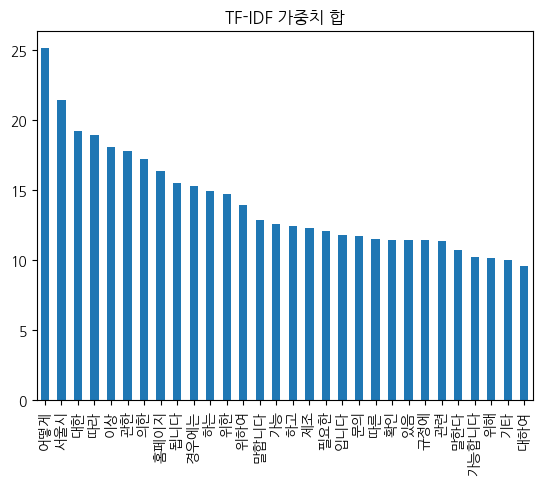

In [38]:
df_dtm.sum().nlargest(30).plot(kind="bar", title="TF-IDF 가중치 합")

In [39]:
# tf_idf 로 학습시키기
W = LDA_MODEL.fit_transform(df_dtm)

In [40]:
H = LDA_MODEL.components_

In [42]:
df_lda_W = pd.DataFrame(W)
df_lda_W

,0,1,2,3,4,5,6,7,8,9
0,0.011337,0.011338,0.011337,0.011339,0.011359,0.011341,0.011337,0.897931,0.011340,0.011341
1,0.016045,0.016044,0.016044,0.016044,0.016045,0.855600,0.016044,0.016045,0.016044,0.016044
2,0.012782,0.884937,0.012773,0.012773,0.012810,0.012788,0.012778,0.012780,0.012787,0.012792
3,0.010142,0.010146,0.010139,0.010140,0.010144,0.010143,0.010141,0.010143,0.010148,0.908713
4,0.011986,0.892114,0.011982,0.011987,0.011985,0.012005,0.011985,0.011984,0.011982,0.011989
...,...,...,...,...,...,...,...,...,...,...
2640,0.016392,0.016391,0.016391,0.016392,0.016391,0.016392,0.016391,0.852477,0.016393,0.016391
2641,0.030349,0.030347,0.030347,0.030347,0.030346,0.726870,0.030349,0.030349,0.030350,0.030347
2642,0.016658,0.016658,0.016658,0.016659,0.016659,0.850076,0.016659,0.016658,0.016658,0.016658
2643,0.018805,0.018809,0.018804,0.018806,0.018804,0.830753,0.018804,0.018804,0.018806,0.018804


In [41]:
df_lda_topic2 = pd.DataFrame(H, columns=tfidvect.get_feature_names_out())
df_lda_topic2.head()

,ㅁ사업시행인가일,ㅁ조합,ㅇㅇ홈페이지가,가가산된,가각은,가각이라하며,가격,가격공고,가격공시,가격과,...,힐링프로그램을,힐링하는,힐스테이트,힘들,힘들경우,힘들고,힘쓰고있습니다,힘쓴다,힘을,힘이
0,0.100000,0.100000,0.1,0.100000,0.333143,0.333143,0.500655,0.1,0.1,0.1,...,0.100000,0.1,0.100000,0.1,0.1,0.1,0.100000,0.1,0.1,0.1
1,0.100000,0.100000,0.1,0.100000,0.100000,0.100000,0.342025,0.1,0.1,0.1,...,0.100000,0.1,0.100000,0.1,0.1,0.1,0.100000,0.1,0.1,0.1
2,0.394424,0.394424,0.1,0.199264,0.100000,0.100000,0.250300,0.1,0.1,0.1,...,0.100000,0.1,0.100000,0.1,0.1,0.1,0.100000,0.1,0.1,0.1
3,0.100000,0.100000,0.1,0.100000,0.100000,0.100000,0.100444,0.1,0.1,0.1,...,0.161869,0.1,0.147896,0.1,0.1,0.1,0.334748,0.1,0.1,0.1
4,0.100000,0.100000,0.1,0.100000,0.100000,0.100000,0.280227,0.1,0.1,0.1,...,0.100000,0.1,0.100207,0.1,0.1,0.1,0.100000,0.1,0.1,0.1


In [43]:
# ['복지', '경제', '환경', '행정', '교통', '주택도시계획', '문화관광', '안전', '건강', '여성가족']

df_lda_W['content'] = df['내용']
df_lda_W['label'] = df['분류']
df_lda_W.head(10)

,0,1,2,3,4,5,6,7,8,9,content,label
0,0.011337,0.011338,0.011337,0.011339,0.011359,0.011341,0.011337,0.897931,0.011340,0.011341,아빠 육아휴직 장려금 업무개요 남성근로자의 육아휴직을 장려하고 양육에 따른 경...,복지
1,0.016045,0.016044,0.016044,0.016044,0.016045,0.855600,0.016044,0.016045,0.016044,0.016044,서울산업진흥원 서울메이드란 서울의 감성을 담은 다양하고 새로운 경험을 제공하기 위해...,경제
2,0.012782,0.884937,0.012773,0.012773,0.012810,0.012788,0.012778,0.012780,0.012787,0.012792,강북구 정비중 업무개요 투명 폐트병을 교환보상하므로 수거율을 높이고 폐기물을 감...,환경
3,0.010142,0.010146,0.010139,0.010140,0.010144,0.010143,0.010141,0.010143,0.010148,0.908713,광진맘택시 운영임산부영아 양육가정 전용 택시 업무개요 교통약자인 임산부와 영아가정...,복지
4,0.011986,0.892114,0.011982,0.011987,0.011985,0.012005,0.011985,0.011984,0.011982,0.011989,마포 뇌병변장애인 비전센터 마포뇌병변장애인 비전센터 운영 구분 내용 목적 학...,복지
5,0.008779,0.008779,0.008782,0.008782,0.920944,0.008786,0.008789,0.008788,0.008783,0.008789,년도 중고 신입생 입학준비금 지원 업무개요 서울시는 전국 최초로 년도부터 개 자...,행정
6,0.010889,0.010886,0.721638,0.010892,0.010891,0.191250,0.010895,0.010883,0.010887,0.010888,위드유 서울 직장 성희롱성폭력 예방센터 업무개요 직장 내 성희롱 지원체계 사각지...,복지
7,0.011162,0.011160,0.011161,0.011166,0.011163,0.011160,0.011163,0.011161,0.899541,0.011162,성동구 반려동물 무료상담실 운영 안내 반려동물 무료상담실무엇이든 물어보시개 운영 안...,경제
8,0.014033,0.014029,0.014033,0.014036,0.014031,0.014031,0.014029,0.014033,0.873712,0.014033,서울시 우리동네꼼꼼육아정보 책자서울시와 서울시육아종합지원센터는 여 명의 우리동네 보...,복지
9,0.008323,0.008322,0.008319,0.008323,0.225898,0.008324,0.008324,0.707519,0.008328,0.008321,반반택시 심야시간 택시 동승앱 업무개요 심야 택시수요 대비 택시공급 부족으로 발...,교통
